<a href="https://colab.research.google.com/github/shudhanshumishra/DeepLearning/blob/main/CNN/LeNet_5_Architecture_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras import Sequential
from keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np

In [3]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,386 (442.91 KB)

 Trainable params: 113,386 (442.91 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [7]:
# Reshape to add channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [8]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 87ms/step - accuracy: 0.8314 - loss: 0.5734 - val_accuracy: 0.9800 - val_loss: 0.0711
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.9758 - loss: 0.0765 - val_accuracy: 0.9842 - val_loss: 0.0538
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - accuracy: 0.9847 - loss: 0.0494 - val_accuracy: 0.9863 - val_loss: 0.0484
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - accuracy: 0.9894 - loss: 0.0350 - val_accuracy: 0.9848 - val_loss: 0.0508
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - accuracy: 0.9898 - loss: 0.0323 - val_accuracy: 0.9888 - val_loss: 0.0417
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9919 - loss: 0.0259 - val_accuracy: 0.9893 - val_loss: 0.0372
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 84ms/step - accuracy: 0.9935 - loss: 0.0197 - val_accuracy: 0.9895 - val_loss: 0.0387
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 84ms/step - accuracy: 0.9944 - loss: 0.0168 - 

In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.9890
Test Loss: 0.0347


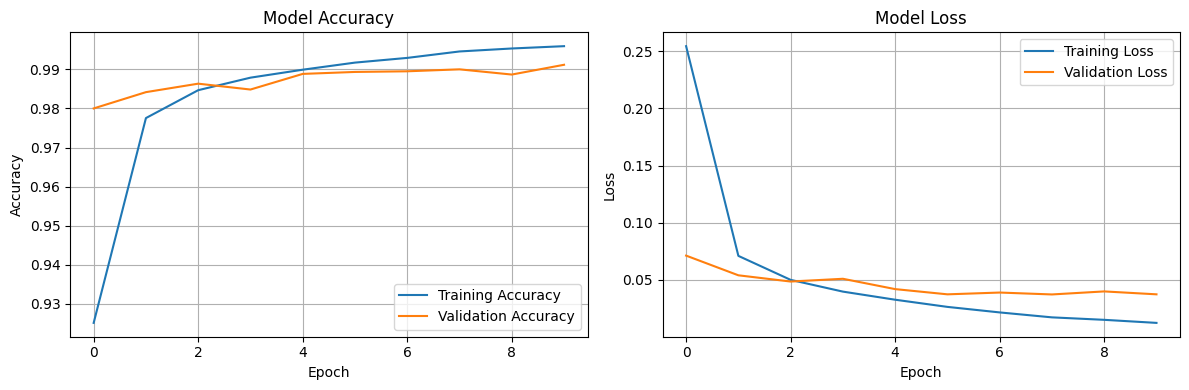

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [15]:
# Make predictions on some test samples
predictions = model.predict(x_test[:5])
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test[:5], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


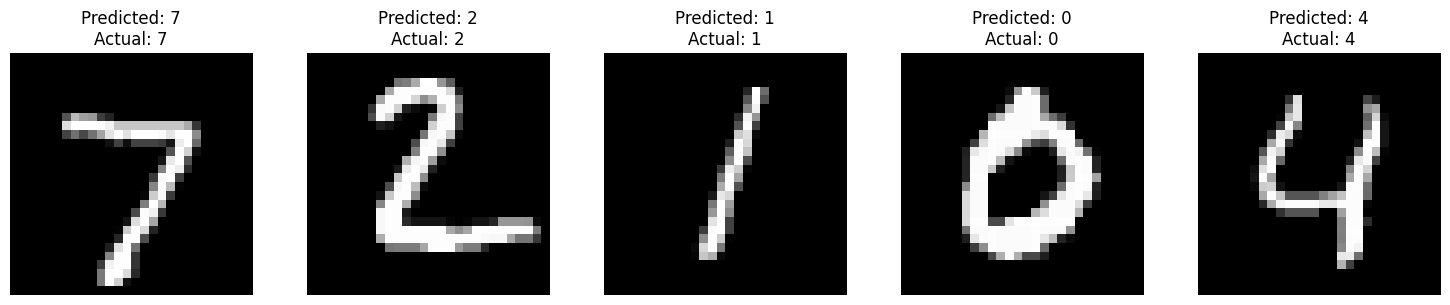

In [16]:
# Display some predictions
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_classes[i]}\nActual: {actual_classes[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [18]:
# Enhanced model with dropout and batch normalization
from tensorflow.keras.layers import BatchNormalization, Dropout

model_enhanced = Sequential()

model_enhanced.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(28,28,1)))
model_enhanced.add(BatchNormalization())
model_enhanced.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model_enhanced.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model_enhanced.add(BatchNormalization())
model_enhanced.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model_enhanced.add(Flatten())

model_enhanced.add(Dense(128, activation='relu'))
model_enhanced.add(Dropout(0.5))
model_enhanced.add(Dense(10, activation='softmax'))

model_enhanced.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_enhanced.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

In [19]:
# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 35s 82ms/step - accuracy: 0.9972 - loss: 0.0086 - val_accuracy: 0.9898 - val_loss: 0.0425
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 84ms/step - accuracy: 0.9970 - loss: 0.0082 - val_accuracy: 0.9910 - val_loss: 0.0413
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.9974 - loss: 0.0071 - val_accuracy: 0.9915 - val_loss: 0.0377
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 81ms/step - accuracy: 0.9979 - loss: 0.0064 - val_accuracy: 0.9895 - val_loss: 0.0476
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 86ms/step - accuracy: 0.9976 - loss: 0.0061 - val_accuracy: 0.9908 - val_loss: 0.0481
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.9986 - loss: 0.0043 - val_accuracy: 0.9873 - val_loss: 0.0713
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.9983 - loss: 0.0049 - val_accuracy: 0.9915 - val_loss: 0.0484
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 84ms/step - accuracy: 0.9990 - loss: 0.0033 - 

In [20]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.9900
Test Loss: 0.0477
